In [2]:
!pip install Sastrawi


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Data Berhasil Diload!
Total Data: 100
                                                text  label Sentiment_Label
0                      Selamat menikmati kemacetan 🤗      0         Negatif
1       Pasti aku besok malam tahun baru hujan nih 😂      0         Negatif
2  Tidak usah merayakan tahun baru tapi rayakanla...      0         Negatif
3                       2026 persib juara deui💙 amin      1         Positif
4                                                 👍🏻      1         Positif

⏳ Sedang melakukan Preprocessing (Cleaning, Stopword, Stemming)...
✅ Preprocessing Selesai!
Contoh Hasil:
                                                 text  \
0                      Selamat menikmati kemacetan 🤗   
1       Pasti aku besok malam tahun baru hujan nih 😂   
2  Tidak usah merayakan tahun baru tapi rayakanla...   
3                       2026 persib juara deui💙 amin   
4                                                 👍🏻   

                                  clean_text  
0           

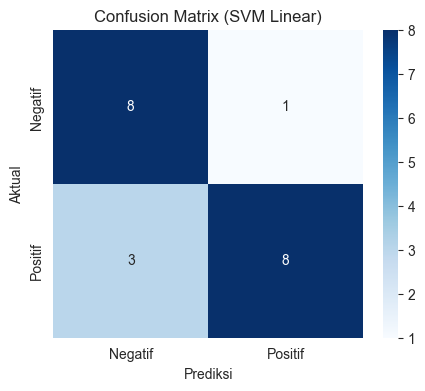


🎨 Membuat Visualisasi WordCloud...


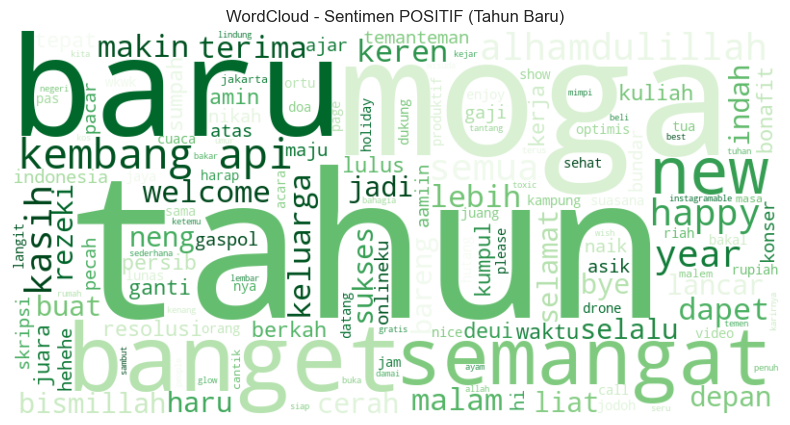

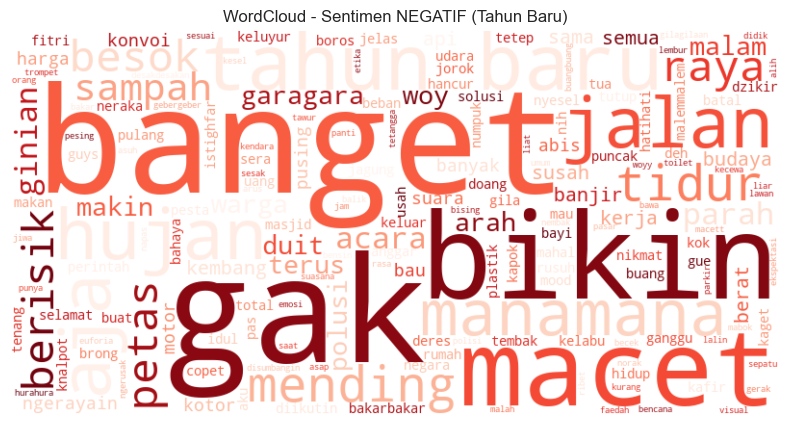

In [12]:
# ==============================================================================
# 1. IMPORT LIBRARY
# ==============================================================================
!pip install Sastrawi wordcloud scikit-learn matplotlib seaborn pandas --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # TAMBAHAN
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud

# ==============================================================================
# 2. LOAD DATASET
# ==============================================================================
# Pastikan nama file sesuai
filename = 'dataset_tahun_baru_2026.csv'
df = pd.read_csv(filename)

# Mapping Label (0=Negatif, 1=Positif)
df['Sentiment_Label'] = df['label'].map({0: 'Negatif', 1: 'Positif'})

print("✅ Data Berhasil Diload!")
print(f"Total Data: {len(df)}")
print(df.head())

# ==============================================================================
# 3. PREPROCESSING LENGKAP (SESUAI MODUL HAL 24)
# ==============================================================================
# Inisialisasi Sastrawi
stemmer = StemmerFactory().create_stemmer()
stopword_remover = StopWordRemoverFactory().create_stop_word_remover() # TAMBAHAN

def preprocess_text(text):
    # 1. Case Folding
    text = str(text).lower()
    # 2. Filtering (Hapus angka & tanda baca)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # 3. Stopword Removal (Hapus kata hubung: yang, dan, di, dll) -> SESUAI MODUL
    text = stopword_remover.remove(text)
    # 4. Stemming (Ubah ke kata dasar) -> SESUAI MODUL
    text = stemmer.stem(text)
    return text

print("\n⏳ Sedang melakukan Preprocessing (Cleaning, Stopword, Stemming)...")
df['clean_text'] = df['text'].apply(preprocess_text)
print("✅ Preprocessing Selesai!")
print("Contoh Hasil:\n", df[['text', 'clean_text']].head())

# ==============================================================================
# 4. SPLIT DATA & TF-IDF (SESUAI MODUL HAL 25)
# ==============================================================================
# Split 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.fillna(''))
X_test_vec = vectorizer.transform(X_test.fillna(''))

print(f"\nJumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

# ==============================================================================
# 5. TRAINING & BANDINGKAN KERNEL (SESUAI MODUL POIN C.3)
# ==============================================================================
# Kita buat fungsi agar bisa membandingkan Kernel Linear vs RBF
def train_evaluate_svm(kernel_type):
    print(f"\n--- Training SVM dengan Kernel: {kernel_type.upper()} ---")
    model = SVC(kernel=kernel_type, C=1.0)
    model.fit(X_train_vec, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Akurasi {kernel_type.upper()}: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif']))
    
    return y_pred, acc

# 1. Jalankan Kernel LINEAR (Biasanya lebih bagus buat teks)
y_pred_linear, acc_linear = train_evaluate_svm('linear')

# 2. Jalankan Kernel RBF (Buat perbandingan di laporan)
y_pred_rbf, acc_rbf = train_evaluate_svm('rbf')

# ==============================================================================
# 6. VISUALISASI CONFUSION MATRIX (UNTUK KERNEL TERBAIK)
# ==============================================================================
# Kita ambil hasil Kernel Linear saja untuk divisualisasikan
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix (SVM Linear)')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# ==============================================================================
# 7. WORDCLOUD (SESUAI MODUL POIN C.4)
# ==============================================================================
print("\n🎨 Membuat Visualisasi WordCloud...")
# Gabungkan teks berdasarkan label asli
text_pos = ' '.join(df[df['label']==1]['clean_text'])
text_neg = ' '.join(df[df['label']==0]['clean_text'])

def plot_wordcloud(text, title, color):
    wc = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(text_pos, "WordCloud - Sentimen POSITIF (Tahun Baru)", "Greens")
plot_wordcloud(text_neg, "WordCloud - Sentimen NEGATIF (Tahun Baru)", "Reds")